# 커피전문점 데이터분석

## 공공데이터를 이용한 지역별 브랜드별 카페 정보 확인(2022)

**처리 목적**

- 공공데이터에서 관련 데이터를 수집해 카페업종의 현황을 확인


**처리 사항**

1. 전국 카페 데이터를 모두 수집
2. 지역별 or 브랜드별 점포 현황을 확인
3. 결과를 시각화



**활용 데이터**
- 소상공인시장진흥공단의 상가정보데이터 : https://www.data.go.kr/data/15083033/fileData.do
- 서울시 구별 주민등록인구수 : https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

## 1. 데이터 불러오기

In [4]:
temp = pd.read_csv("data/sosang_store/소상공인시장진흥공단_상가(상권)정보_인천_202212.csv", encoding='utf-8')
temp.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,27458653,칼스배드영수학원,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,28,인천광역시,28245,계양구,2824572000,계양2동,2824510500,임학동,2824510500100430000,1,대지,43,NaN,인천광역시 계양구 임학동 43,282454265369,인천광역시 계양구 임학서로41번길,5,NaN,2824510500100430000000001,라임빌,인천광역시 계양구 임학서로41번길 5,407814.0,21030.0,NaN,NaN,NaN,126.731284,37.546507
1,22882934,간석미용실,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,28,인천광역시,28200,남동구,2820054000,간석2동,2820010200,간석동,2820010200101900026,1,대지,190,26.0,인천광역시 남동구 간석동 190-26,282004259466,인천광역시 남동구 석촌로14번길,5,NaN,2820010200101900026021270,NaN,인천광역시 남동구 석촌로14번길 5,405230.0,21545.0,NaN,NaN,NaN,126.709349,37.461969
2,24444979,라헬,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,셔츠 및 기타 의복 소매업,28,인천광역시,28185,연수구,2818579500,동춘3동,2818510500,동춘동,2818510500109230000,1,대지,923,NaN,인천광역시 연수구 동춘동 923,281852008006,인천광역시 연수구 청능대로,124,NaN,2818510500109230000007532,금호동아아파트,인천광역시 연수구 청능대로 124,406775.0,21967.0,NaN,NaN,NaN,126.677224,37.410678


### 파일 관련 작업에 편리한 모듈들

- pickle
    - 파이썬 객체(자료형)를 파일에 읽고 쓰기 작업


- glob
    - 파일/디렉터리 목록를 뽑을 때 사용
    - 파일의 경로명과 기호를 이용해서 원하는 파일 경로를 생성해 낼 수 있음


- os / os.path
    - 운영체제의 파일 관련 작업 명령에 대한 함수 제공

#### pickle 모듈 사용 예

In [5]:
# pickle 예제
import pickle

users = {'kim':'3kid9','sun80':'393948','ljm':'py90390'}
with open('users.txt','wb') as f:
    pickle.dump(users,f)

In [6]:
import os

os.path.exists('users.txt')

True

In [7]:
with open('users.txt', 'rb') as f:
    a=pickle.load(f)
a

{'kim': '3kid9', 'sun80': '393948', 'ljm': 'py90390'}

#### glob 모듈 사용 예

In [8]:
from glob import glob

glob('*.ipynb')  #현재 디렉터리의 ~파일
glob('*.txt')    #현재 디렉터리의 ~파일

['0_노트북사용.ipynb',
 'pandas_01_소개.ipynb',
 'pandas_02_Series.ipynb',
 'pandas_03_DataFrame.ipynb',
 'pandas_04_DataFrame인덱서_loc과iloc.ipynb',
 'pandas_06_데이터파악1.ipynb',
 'pandas_06_데이터파악2_plot으로시각화.ipynb',
 'pandas_07_데이터조작1_빈도_정렬_집계.ipynb',
 'pandas_07_데이터조작2_삭제_변경_결측치.ipynb',
 'pandas_07_데이터조작3_apply.ipynb',
 'pandas_07_데이터조작4_열재구성_필터링.ipynb',
 'pandas_07_데이터조작5_전처리.ipynb',
 'pandas_07_데이터파악과조작_연습문제.ipynb',
 'pandas_07_데이터합치기.ipynb',
 'pandas_08_데이터그룹별분석.ipynb',
 'pandas_09_다중인덱스.ipynb',
 'pandas_10_데이터_재구조화1_pivoting.ipynb',
 'semipro.ipynb',
 '데이터분석교재.ipynb',
 '문제 1. 시리즈 연습문제.ipynb',
 '문제 2. 데이터프레임 연습문제.ipynb',
 '복습용.ipynb',
 '커피전문점_데이터분석(2022년도 12월기준).ipynb']

['users.txt']

#### os 모듈 사용 예

In [9]:
from glob import glob
from os.path import isdir

for x in glob('../*'):
    if isdir(x):   #디렉터리인가?
        print(x, '<DIR>')
    else:
        print(x)

..\pandas <DIR>
..\PyTeam <DIR>
..\Python-Game <DIR>
..\pythonst <DIR>
..\타이타닉분석.ipynb


In [10]:
for x in glob('*'):
    if isdir(x):    #디렉터리인가?
        print(x, '<DIR>')
    else:
        print(x)

0_노트북사용.ipynb
data <DIR>
pandas_01_소개.ipynb
pandas_02_Series.ipynb
pandas_03_DataFrame.ipynb
pandas_04_DataFrame인덱서_loc과iloc.ipynb
pandas_06_데이터파악1.ipynb
pandas_06_데이터파악2_plot으로시각화.ipynb
pandas_07_데이터조작1_빈도_정렬_집계.ipynb
pandas_07_데이터조작2_삭제_변경_결측치.ipynb
pandas_07_데이터조작3_apply.ipynb
pandas_07_데이터조작4_열재구성_필터링.ipynb
pandas_07_데이터조작5_전처리.ipynb
pandas_07_데이터파악과조작_연습문제.ipynb
pandas_07_데이터합치기.ipynb
pandas_08_데이터그룹별분석.ipynb
pandas_09_다중인덱스.ipynb
pandas_10_데이터_재구조화1_pivoting.ipynb
semipro.ipynb
users.txt
데이터분석교재.ipynb
문제 1. 시리즈 연습문제.ipynb
문제 2. 데이터프레임 연습문제.ipynb
복습용.ipynb
커피전문점_데이터분석(2022년도 12월기준).ipynb


-----------------------------

### 1) glob 사용(수집된 데이터의 모든 csv 파일을 읽어옴)

In [11]:
# data 폴더에 있는 모든 csv파일을 읽어오기

from glob import glob

#csv 목록 불러오기
file_names = glob("./data/sosang_store/*.csv")
file_names


['./data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_강원_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_경기_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_경남_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_경북_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_광주_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_대구_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_대전_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_부산_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_서울_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_세종_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_울산_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_인천_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_전남_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_전북_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_제주_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_충남_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_충북_202212.csv

### 2) 소상공인 상점관련 csv 파일들 합치기

#### concat() 이용한 행결합

In [12]:
# csv 읽어와서 기존 df에 병합 : concat 함수 사용

total = pd.DataFrame()

# 모든 csv 행결합하기
for file_name in file_names:
    temp = pd.read_csv(file_name,sep=',', encoding='utf-8')
    total = pd.concat([total,temp])

C:\Users\namu9\AppData\Local\Temp\ipykernel_14444\2509351385.py:7: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name,sep=',', encoding='utf-8')
C:\Users\namu9\AppData\Local\Temp\ipykernel_14444\2509351385.py:7: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name,sep=',', encoding='utf-8')
C:\Users\namu9\AppData\Local\Temp\ipykernel_14444\2509351385.py:7: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name,sep=',', encoding='utf-8')
C:\Users\namu9\AppData\Local\Temp\ipykernel_14444\2509351385.py:7: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name,sep=',', encoding='utf-8')
C:\Users\namu9\AppData\Local\Temp\ipykernel_14444\2509351385.py:7: DtypeWarning: Columns (35) ha

#### 합친 파일 확인하기

In [13]:
total.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,자동차 타이어 및 튜브 판매업,42,강원도,42150,강릉시,4215057100,포남1동,4215011100,포남동,4215011100110960006,1,대지,1096,6.0,강원도 강릉시 포남동 1096-6,421503220001,강원도 강릉시 가작로,270,NaN,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,NaN,42,강원도,42150,강릉시,4215058000,초당동,4215011300,강문동,4215011300100010001,1,대지,1,1.0,강원도 강릉시 강문동 1-1,421503220043,강원도 강릉시 창해로,307,NaN,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,NaN,42,강원도,42760,평창군,4276038000,대관령면,4276038024,대관령면,4276038024102450066,1,대지,245,66.0,강원도 평창군 대관령면 횡계리 245-66,427604484284,강원도 평창군 대관령면 오목길,107,NaN,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051


#### 통합한 상점정보 데이터프레임의 변수 정보 확인

In [14]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532877 entries, 0 to 96932
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 
 

#### 통합한 데이터프레임의 인덱스 재설정

In [15]:
# index 정리
total.reset_index(inplace=True, drop=True)
total

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,자동차 타이어 및 튜브 판매업,42,강원도,42150,강릉시,4215057100,포남1동,4215011100,포남동,4215011100110960006,1,대지,1096,6.0,강원도 강릉시 포남동 1096-6,421503220001,강원도 강릉시 가작로,270,NaN,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,NaN,42,강원도,42150,강릉시,4215058000,초당동,4215011300,강문동,4215011300100010001,1,대지,1,1.0,강원도 강릉시 강문동 1-1,421503220043,강원도 강릉시 창해로,307,NaN,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,NaN,42,강원도,42760,평창군,4276038000,대관령면,4276038024,대관령면,4276038024102450066,1,대지,245,66.0,강원도 평창군 대관령면 횡계리 245-66,427604484284,강원도 평창군 대관령면 오목길,107,NaN,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,NaN,42,강원도,42150,강릉시,4215035000,옥계면,4215035029,옥계면,4215035029100920001,1,대지,92,1.0,강원도 강릉시 옥계면 금진리 92-1,421503220051,강원도 강릉시 옥계면 헌화로,455,34.0,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,가구 소매업,42,강원도,42130,원주시,4213066000,무실동,4213011500,무실동,4213011500111400020,1,대지,1140,20.0,강원도 원주시 무실동 1140-20,421304457386,강원도 원주시 송삼길,156,19.0,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150.0,26385.0,NaN,NaN,NaN,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532872,19073226,원조사계절칡냉면,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,43,충청북도,43740,영동군,4374025000,영동읍,4374025028,영동읍,4374025028100810002,1,대지,81,2.0,충청북도 영동군 영동읍 부용리 81-2,437403243054,충청북도 영동군 영동읍 학산영동로,1170,NaN,4374025028100810002002706,NaN,충청북도 영동군 영동읍 학산영동로 1170,370802.0,29152.0,NaN,NaN,NaN,127.768971,36.167841
2532873,19073414,만능수리,NaN,F,생활서비스,F03,개인/가정용품수리,F03A05,에어컨수리/설치,S95310,가전제품 수리업,43,충청북도,43130,충주시,4313035000,신니면,4313035021,신니면,4313035021102780001,1,대지,278,1.0,충청북도 충주시 신니면 용원리 278-1,431304515120,충청북도 충주시 신니면 용원2길,26,NaN,4313035021102780001042473,NaN,충청북도 충주시 신니면 용원2길 26,380891.0,27457.0,NaN,NaN,NaN,127.735163,36.997242
2532874,19074611,다모아인력,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,N75919,기타 사무지원 서비스업,43,충청북도,43770,음성군,4377035000,삼성면,4377035021,삼성면,4377035021105480007,1,대지,548,7.0,충청북도 음성군 삼성면 덕정리 548-7,437703247013,충청북도 음성군 삼성면 덕정로,75,NaN,4377035021105480007171082,NaN,충청북도 음성군 삼성면 덕정로 75,369833.0,27649.0,NaN,2,NaN,127.499859,37.020851
2532875,19078175,와이케이푸드,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,43,충청북도,43730,옥천군,4373025000,옥천읍,4373025037,옥천읍,4373025037103440005,1,대지,344,5.0,충청북도 옥천군 옥천읍 장야리 344-5,437303242012,충청북도 옥천군 옥천읍 문장로,104,NaN,4373025037103440002009741,슈퍼,충청북도 옥천군 옥천읍 문장로 104,373805.0,29049.0,NaN,NaN,NaN,127.576315,36.296025


#### 통합한 상점 데이터프레임의 크기 확인

In [16]:
total.shape

(2532877, 39)

### 3) 사용할 컬럼만 추출한 새로운 데이터프레임 생성

#### 통합 데이터프레임의 컬럼명 확인

In [17]:
total.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

#### 사용할 컬럼 지정하여 추출 

- '상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명',
  '시군구명', '행정동명', '경도', '위도'

In [18]:
#사용할 컬럼만 선택 : 기본 인덱싱 사용 => df[[컬럼1,컬럼2....]]

data = total[['상호명','지점명','상권업종대분류명','상권업종중분류명','상권업종소분류명',
                '시도명','시군구명','행정동명','경도','위도']]
data

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,동그라미중고타이어,NaN,소매,자동차/자동차용품,타이어판매,강원도,강릉시,포남1동,128.904472,37.770252
1,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,호텔/콘도,강원도,강릉시,초당동,128.920908,37.791299
2,평창라마다호텔,NaN,숙박,호텔/콘도,호텔/콘도,강원도,평창군,대관령면,128.717971,37.660051
3,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,호텔/콘도,강원도,강릉시,옥계면,129.052902,37.654680
4,레이디가구,NaN,소매,가구소매,일반가구소매,강원도,원주시,무실동,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...
2532872,원조사계절칡냉면,NaN,음식,한식,한식/백반/한정식,충청북도,영동군,영동읍,127.768971,36.167841
2532873,만능수리,NaN,생활서비스,개인/가정용품수리,에어컨수리/설치,충청북도,충주시,신니면,127.735163,36.997242
2532874,다모아인력,NaN,생활서비스,대행업,고객관리대행,충청북도,음성군,삼성면,127.499859,37.020851
2532875,와이케이푸드,NaN,음식,한식,한식/백반/한정식,충청북도,옥천군,옥천읍,127.576315,36.296025


#### 새로 추출한 데이터프레임 data 정보 확인

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532877 entries, 0 to 2532876
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상호명       object 
 1   지점명       object 
 2   상권업종대분류명  object 
 3   상권업종중분류명  object 
 4   상권업종소분류명  object 
 5   시도명       object 
 6   시군구명      object 
 7   행정동명      object 
 8   경도        float64
 9   위도        float64
dtypes: float64(2), object(8)
memory usage: 193.2+ MB


### 4) 새로 생성한 데이터프레임을 csv 파일로 저장

In [20]:
total.to_csv('data/sosang_store/total_store.csv', encoding='utf-8')

In [21]:
data.to_csv('data/sosang_store/data_store.csv', encoding='utf-8')

#### 저장된 파일 확인 : glob() 사용

In [22]:
glob("./data/sosang_store/*.csv")

['./data/sosang_store\\data_store.csv',
 './data/sosang_store\\total_store.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_강원_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_경기_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_경남_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_경북_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_광주_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_대구_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_대전_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_부산_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_서울_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_세종_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_울산_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_인천_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_전남_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_전북_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_상가(상권)정보_제주_202212.csv',
 './data/sosang_store\\소상공인시장진흥공단_

### 5) 통합한 전체데이터프레임 삭제

In [23]:
#원본 csv 파일이 있으니 전체 데이터는 삭제함

del total

#### 삭제 되었는지 확인

In [24]:
#total.head()

## 2. 데이터 살펴보기

### 결측치 확인 및 처리

In [25]:
data['시도명'].isnull().sum()

0

In [26]:
data[data['시도명'].isnull()]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도


In [27]:
data['시도명'].notnull().sum()

2532877

In [28]:
data.shape

(2532877, 10)

In [29]:
data = data[data['시도명'].notnull()]

In [30]:
data.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,동그라미중고타이어,NaN,소매,자동차/자동차용품,타이어판매,강원도,강릉시,포남1동,128.904472,37.770252
1,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,호텔/콘도,강원도,강릉시,초당동,128.920908,37.791299
2,평창라마다호텔,NaN,숙박,호텔/콘도,호텔/콘도,강원도,평창군,대관령면,128.717971,37.660051
3,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,호텔/콘도,강원도,강릉시,옥계면,129.052902,37.654680
4,레이디가구,NaN,소매,가구소매,일반가구소매,강원도,원주시,무실동,127.917307,37.327668


### 1) 상권 업종 분류 현황 확인(대분류/중분류)

#### 업종 대분류명 확인

- 중복 제거하고 어떤 대분류명이 있는지 확인하기

In [31]:
data["상권업종대분류명"][:20]

0        소매
1        숙박
2        숙박
3        숙박
4        소매
5     학문/교육
6        음식
7        음식
8        소매
9        소매
10    생활서비스
11       소매
12       소매
13       음식
14       음식
15       음식
16       음식
17       소매
18       소매
19       소매
Name: 상권업종대분류명, dtype: object

In [32]:
# 원소 내용이 중복되어 있으므로 중복을 제거하고 확인
data["상권업종대분류명"].unique()

array(['소매', '숙박', '학문/교육', '음식', '생활서비스', '부동산', '관광/여가/오락', '스포츠'],
      dtype=object)

#### 업종 중분류명 확인

- 중복 제거하고 어떤 중분류명이 있는지 확인하기

- 방법1. set() 사용

In [33]:
#중분류 확인 - 정복제거 set()을 활용해도 동일함
set(data["상권업종중분류명"])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 

In [34]:
len(set(data["상권업종중분류명"]))

89

- 방법2. unique() 사용

In [35]:
## 분석 대상인 커피전문점은 중분류의 커피점/카페로 확인
data["상권업종중분류명"].unique()

array(['자동차/자동차용품', '호텔/콘도', '가구소매', '학원기타', '유흥주점', '철물/난방/건설자재소매',
       '주유소/충전소', '가방/신발/액세서리', '가정/주방/인테리어', '커피점/카페', '한식', '화장품소매',
       '선물/팬시/기념품', '캠프/별장/펜션', '음/식료품소매', '민박/하숙', '부동산중개', '의복의류',
       '학원-음악미술무용', '개인/가정용품수리', '분식', '세탁/가사서비스', '주택수리', '인력/고용/용역알선',
       '가전제품소매', '기타판매업', '학원-어학', '종합소매점', '일식/수산물', '사무/문구/컴퓨터',
       '이/미용/건강', '제과제빵떡케익', '모텔/여관/여인숙', '무도/유흥/가무', '광고/인쇄',
       '취미/오락관련소매', '사진/광학/정밀기기소매', '자동차/이륜차', '대중목욕탕/휴게', '놀이/여가/취미',
       '건강/미용식품', '패스트푸드', '실내운동시설', '학원-창업취업취미', '닭/오리요리', '시계/귀금속소매',
       '중식', '페인트/유리제품소매', '중고품소매/교환', '유아교육', '유아용품', '학원-예능취미체육',
       '요가/단전/마사지', '운동/경기용품소매', '학원-보습교습입시', '대행업', '실외운동시설', '의약/의료품소매',
       '분양', 'PC/오락/당구/볼링등', '기타서비스업', '학문교육기타', '별식/퓨전요리', '책/서적/도서',
       '장례/묘지', '물품기기대여', '양식', '애견/애완/동물', '사진', '기타음식업', '도서관/독서실',
       '법무세무회계', '행사/이벤트', '개인서비스', '운송/배달/택배', '예술품/골동품/수석/분재', '부페',
       '예식/의례/관혼상제', '학원-자격/국가고시', '음식배달서비스', '경마/경륜/성인오락', '스포츠/운동',
       '종교용품판매', '운영

In [36]:
print('중분류 개수: %d' % len(data["상권업종중분류명"].unique()))

중분류 개수: 89


In [37]:
'커피점/카페' in data["상권업종중분류명"].unique()

True

-> 중분류명에서 '커피점/카페' 업종이 있는지 확인

### 2)  '커피점/카페' 업종 데이터 추출

#### 전국의 커피점/카페 업종 데이터만 추출하여 df_cafe로 저장

In [38]:
df_cafe = data[data['상권업종중분류명'] == '커피점/카페']
df_cafe

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
13,키즈까페아이사랑,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,성덕동,128.919456,37.759315
39,힐링,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,단구동,127.958442,37.319958
56,드롭탑,속초엑스포점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,조양동,128.586322,38.191024
83,상유재카페,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,정선군,정선읍,128.660805,37.379458
269,수정다방,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,고성군,거진읍,128.456166,38.447977
...,...,...,...,...,...,...,...,...,...,...
2532834,카페니프,NaN,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,강서1동,127.414859,36.635668
2532835,130에스프레소,NaN,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 청원구,내덕1동,127.488217,36.655544
2532836,카페,올림푸스보드,음식,커피점/카페,보드게임카페,충청북도,청주시 청원구,율량.사천동,127.483190,36.664642
2532849,설빙,호암점,음식,커피점/카페,커피전문점/카페/다방,충청북도,충주시,호암.직동,127.925491,36.957421


#### df_cafe 데이터프레임의 인덱스 재설정

In [39]:
# index 정리
df_cafe.reset_index(inplace=True, drop=True)

#### 전국 카페 매장수와 df_cafe 데이터프레임 일부 내용 출력

In [40]:
print(f'전국 카페 매장 수 : {len(df_cafe)}개')
df_cafe

전국 카페 매장 수 : 118168개


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,키즈까페아이사랑,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,성덕동,128.919456,37.759315
1,힐링,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,단구동,127.958442,37.319958
2,드롭탑,속초엑스포점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,조양동,128.586322,38.191024
3,상유재카페,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,정선군,정선읍,128.660805,37.379458
4,수정다방,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,고성군,거진읍,128.456166,38.447977
...,...,...,...,...,...,...,...,...,...,...
118163,카페니프,NaN,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,강서1동,127.414859,36.635668
118164,130에스프레소,NaN,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 청원구,내덕1동,127.488217,36.655544
118165,카페,올림푸스보드,음식,커피점/카페,보드게임카페,충청북도,청주시 청원구,율량.사천동,127.483190,36.664642
118166,설빙,호암점,음식,커피점/카페,커피전문점/카페/다방,충청북도,충주시,호암.직동,127.925491,36.957421


### 3) 지역별 카페 매장 수 확인

#### 전국 시도명 추출

In [41]:
data['시도명'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [42]:
len(data['시도명'].unique())

17

In [43]:
data.reset_index(inplace=True, drop=True)
data.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,동그라미중고타이어,NaN,소매,자동차/자동차용품,타이어판매,강원도,강릉시,포남1동,128.904472,37.770252
1,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,호텔/콘도,강원도,강릉시,초당동,128.920908,37.791299
2,평창라마다호텔,NaN,숙박,호텔/콘도,호텔/콘도,강원도,평창군,대관령면,128.717971,37.660051
3,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,호텔/콘도,강원도,강릉시,옥계면,129.052902,37.654680
4,레이디가구,NaN,소매,가구소매,일반가구소매,강원도,원주시,무실동,127.917307,37.327668


#### 시도별 카페 매장 수 출력

In [44]:
n_dosi_cafe = df_cafe['시도명'].value_counts()
n_dosi_cafe

경기도        26654
서울특별시      21620
경상남도        7796
부산광역시       7371
경상북도        6843
인천광역시       5957
대구광역시       5452
충청남도        5182
강원도         4768
전라북도        4641
전라남도        4629
충청북도        3867
대전광역시       3634
광주광역시       3500
제주특별자치도     3086
울산광역시       2453
세종특별자치시      715
Name: 시도명, dtype: int64

In [45]:
print("전국 카페 매장 총수:", n_dosi_cafe.sum())

전국 카페 매장 총수: 118168


### 4) 서울 지역의 카페 데이터 추출

#### 방법1. 전체 상점 데이터프레임 data로 부터 추출

- 서울시 카페 데이터프레임은 df_cafe_seoul로 저장

In [46]:
df_cafe_seoul = data[(data["상권업종중분류명"] == "커피점/카페") 
                & (data["시도명"] == '서울특별시')]

- 생성한 데이터프레임의 크기 확인

In [47]:
df_cafe_seoul.shape

(21620, 10)

- 생성된 서울시 내 카페 데이터 확인

In [48]:
df_cafe_seoul.tail()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
1828592,힐리HILLI,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,127.010938,37.512931
1828603,월성맨션,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,상암동,126.892296,37.579186
1828611,덩키카페,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성2동,127.049151,37.505595
1828613,감화커피,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,화곡8동,126.846106,37.535791
1828616,텐퍼센트커피,시흥사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,금천구,시흥1동,126.899911,37.454688


- 서울시 카페 데이터프레임의 인덱스 재설정(기존 인덱스는 제거)

In [49]:
df_cafe_seoul.reset_index(inplace=True, drop=True)

- 서울시 내 카페 매장 수 출력 및 데이터프레임 데이터 일부 확인

In [50]:
print(f' 서울시 내 커피 전문점 점포 수 : {len(df_cafe_seoul)}개')

df_cafe_seoul

 서울시 내 커피 전문점 점포 수 : 21620개


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,혜화동,127.000171,37.583149
1,요거프레소,쌍문점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,도봉구,쌍문2동,127.034746,37.658728
2,우성커피숍,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,신월4동,126.842935,37.522055
3,버블베어,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,방화3동,126.813358,37.580941
4,알뤼르,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치4동,127.054731,37.504378
...,...,...,...,...,...,...,...,...,...,...
21615,힐리HILLI,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,127.010938,37.512931
21616,월성맨션,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,상암동,126.892296,37.579186
21617,덩키카페,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성2동,127.049151,37.505595
21618,감화커피,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,화곡8동,126.846106,37.535791


- 서울시 카페 데이터프레임의 정보 확인

In [51]:
df_cafe_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21620 entries, 0 to 21619
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       21620 non-null  object 
 1   지점명       7828 non-null   object 
 2   상권업종대분류명  21620 non-null  object 
 3   상권업종중분류명  21620 non-null  object 
 4   상권업종소분류명  21620 non-null  object 
 5   시도명       21620 non-null  object 
 6   시군구명      21620 non-null  object 
 7   행정동명      21620 non-null  object 
 8   경도        21620 non-null  float64
 9   위도        21620 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


#### 방법2. df_cafe 데이터프레임을 사용하여 서울시 카페 데이터 추출

- 서울시 카페 데이터프레임은 df_cafe_seoul2로 저장

In [52]:
df_cafe_seoul2 = df_cafe[df_cafe["시도명"] == "서울특별시"]
df_cafe_seoul2.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
66018,커피빈,코리아대학로대명거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,혜화동,127.000171,37.583149
66019,요거프레소,쌍문점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,도봉구,쌍문2동,127.034746,37.658728
66020,우성커피숍,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,신월4동,126.842935,37.522055
66021,버블베어,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,방화3동,126.813358,37.580941
66022,알뤼르,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치4동,127.054731,37.504378


- 생성한 데이터프레임의 크기 확인

In [53]:
df_cafe_seoul2.shape

(21620, 10)

- 생성된 서울시 내 카페 데이터 확인

In [54]:
df_cafe_seoul2.tail()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
87633,힐리HILLI,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,127.010938,37.512931
87634,월성맨션,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,상암동,126.892296,37.579186
87635,덩키카페,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성2동,127.049151,37.505595
87636,감화커피,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,화곡8동,126.846106,37.535791
87637,텐퍼센트커피,시흥사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,금천구,시흥1동,126.899911,37.454688


- 서울시 카페 데이터프레임의 인덱스 재설정(기존 인덱스는 제거)

In [55]:
df_cafe_seoul2.reset_index(inplace=True,drop=True)

- 서울시 내 카페 매장 수 출력 및 데이터프레임 데이터 일부 확인

In [56]:
print(f'서울시 내 커피 전문점 점포 수 : {len(df_cafe_seoul2)}개')
df_cafe_seoul2

서울시 내 커피 전문점 점포 수 : 21620개


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,혜화동,127.000171,37.583149
1,요거프레소,쌍문점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,도봉구,쌍문2동,127.034746,37.658728
2,우성커피숍,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,신월4동,126.842935,37.522055
3,버블베어,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,방화3동,126.813358,37.580941
4,알뤼르,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치4동,127.054731,37.504378
...,...,...,...,...,...,...,...,...,...,...
21615,힐리HILLI,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,127.010938,37.512931
21616,월성맨션,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,상암동,126.892296,37.579186
21617,덩키카페,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성2동,127.049151,37.505595
21618,감화커피,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,화곡8동,126.846106,37.535791


- 서울시 카페 데이터프레임의 정보 확인

In [57]:
df_cafe_seoul2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21620 entries, 0 to 21619
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       21620 non-null  object 
 1   지점명       7828 non-null   object 
 2   상권업종대분류명  21620 non-null  object 
 3   상권업종중분류명  21620 non-null  object 
 4   상권업종소분류명  21620 non-null  object 
 5   시도명       21620 non-null  object 
 6   시군구명      21620 non-null  object 
 7   행정동명      21620 non-null  object 
 8   경도        21620 non-null  float64
 9   위도        21620 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


#### <검토사항> 결측치가 있는 변수는 무엇인가?

#### <검토사항> 방법1과 방법2로 추출한 서울시 카페 데이터들을 같은가 다른가?

---------------------------------------

### 분석 항목

- 프렌차이즈 카페 매장을 추출하여 각 매장의 전국 시도별 매장수와 서울시 구별 매장수를 계산하고 시각화
- 전국에서 가장 많은 매장을 가지고 있는 브랜드와 순위 Top5
- 서울시내 가장 많은 매장을 가지고 있는 브랜드와 순위 Top5
- 스타벅스는 어디에 가장 많은 매장을 가지고 있는가?
- 전국의 프렌차이즈 카페가 전체 카페에서 차지하는 비중은?
- 서울시내 프렌차이즈 카페가 전체 카페에서 차지하는 비중은?
- 카페 종류는 어떤 것들이 있는가?

## 3. 프렌차이즈 카페 추출

### 1) 서울시 스타벅스 매장 추출

#### 서울시 카페 데이터프레임의 '지점명'에 데이터가 있는 카페만 추출

- df_cafe_seoul 데이터프레임을 사용하여 '지점명'컬럼 값이 null이 아닌 데이터만 추출
- 시리즈 데이터에서 결측치가 아님은 확인하는 메서드 notnull() 사용
- 데이터프레임은 df_seoul_fran으로 저장

In [58]:
# 프랜차이즈 카페 추출, 지점명이 있는 카페만 추출함

df_seoul_fran = df_cafe_seoul[df_cafe_seoul['지점명'].notnull()].reset_index(drop=True)
df_seoul_fran

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,혜화동,127.000171,37.583149
1,요거프레소,쌍문점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,도봉구,쌍문2동,127.034746,37.658728
2,커피빈코리아낙성대역점,코리아낙성대역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,행운동,126.961593,37.478106
3,탐앤탐스,막스앤스펜서점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,127.026033,37.525554
4,커핀그루나루신천점,신천점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,송파구,잠실본동,127.082767,37.510988
...,...,...,...,...,...,...,...,...,...,...
7823,카페,케이스팟수국전망대,음식,커피점/카페,커피전문점/카페/다방,서울특별시,중구,회현동,126.976586,37.557538
7824,메가엠지씨커피,종암점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성북구,종암동,127.034692,37.598971
7825,카페,소그노,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,행당1동,127.033070,37.558834
7826,컴포즈커피,답십리래미안점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,동대문구,답십리1동,127.055580,37.572478


#### 서울시 스타벅스 매장 추출① : 서울시 카페 프렌차이즈 데이터에서 스타벅스 매장 추출

- df_seoul_fran 데이터프레임에서 '상호명' 컬럼에 '스타벅스' 문자열이 들어있는 행추출
- 시리즈 데이터의 str.contains() 메서드 사용

In [59]:
df_star = df_seoul_fran[df_seoul_fran['상호명'].str.contains('스타벅스')]
df_star

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
14,스타벅스,동숭로아트점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,127.003887,37.582964
23,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초3동,127.014198,37.484386
25,스타벅스,현대목동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목1동,126.874682,37.527147
41,스타벅스미아사거리역점,미아사거리역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강북구,송중동,127.030685,37.611841
42,스타벅스,가로수길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,127.021629,37.523184
...,...,...,...,...,...,...,...,...,...,...
6108,스타벅스,강남세곡점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,세곡동,127.099909,37.467265
6164,스타벅스,태릉입구역DT점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,공릉1동,127.079298,37.619249
6194,스타벅스,서울역사점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,남영동,126.971712,37.554828
6213,스타벅스,도산사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,논현2동,127.034097,37.519593


- 추출된 서울시 스타벅스 매장 수 확인

#### 서울시 스타벅스 매장 추출② : 서울시 카페 데이터에서 스타벅스 매장 추출

- df_cafe_seoul 데이터프레임에서 '상호명' 컬럼에 '스타벅스' 문자열이 들어있는 행추출
- 시리즈 데이터의 str.contains() 메서드 사용

In [60]:
df_star2 = df_cafe_seoul[df_cafe_seoul['상호명'].str.contains('스타벅스')]
df_star2

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
35,스타벅스,동숭로아트점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,127.003887,37.582964
64,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초3동,127.014198,37.484386
67,스타벅스,현대목동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목1동,126.874682,37.527147
103,스타벅스미아사거리역점,미아사거리역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강북구,송중동,127.030685,37.611841
105,스타벅스,가로수길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,127.021629,37.523184
...,...,...,...,...,...,...,...,...,...,...
16246,스타벅스,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,광진구,중곡1동,127.081329,37.562814
16301,스타벅스,태릉입구역DT점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,공릉1동,127.079298,37.619249
16353,스타벅스,서울역사점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,남영동,126.971712,37.554828
16411,스타벅스,도산사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,논현2동,127.034097,37.519593


- 서울시 스타벅스 매장 수 확인

**<검토사항>**
1. 서울시 카페 프렌차이즈 데이터프레임에서 추출한 스타벅스 매장수가 서울시 카페 데이터프레임에서 추출한 스타벅스 매장수와 차이가 있는가? : 있다.


2. 있다면 왜 있는가? : 지점명이 NAN으로 없는 곳이 있다.

3. 스타벅스 매장 중 지점명이 없는 매장은 몇개인가?

#### 스타벅스 매장 중 지점명이 없는 매장 추출

In [61]:
df_cafe_seoul[(df_cafe_seoul['상호명'].str.contains('스타벅스')) & 
             (df_cafe_seoul['지점명'].isna())]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
328,스타벅스논현힐탑,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,논현2동,127.032255,37.511585
370,스타벅스을지로입구,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,중구,명동,126.983212,37.567200
1032,스타벅스경복궁역,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,사직동,126.972616,37.577173
1757,스타벅스명동중앙로,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,중구,명동,126.985738,37.563762
4858,스타벅스방화DT,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,방화1동,126.816371,37.574439
6613,스타벅스가든파이브,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,송파구,문정2동,127.119371,37.478261
6736,스타벅스커피가산브이타워,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,금천구,가산동,126.883684,37.477224
6825,스타벅스압구정로데오역,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,청담동,127.040513,37.526538
7353,스타벅스성신여대정문,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성북구,동선동,127.018842,37.590830
7580,스타벅스커피마포염리,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,염리동,126.947463,37.543991


#### 서울시 스타벅스 매장 추출③ : 서울시 카페 데이터에서 스타벅스 매장 추출

- df_cafe_seoul 데이터프레임에서 '상호명' 컬럼에 '스타벅스' 문자열이 들어있는 행을 추출하는 함수 정의하여 사용
- nest_in() 함수 정의

In [62]:
# 문자열에서 st 저장 문자열이 포함되어 있는지 확인

def nest_in(x, st) :
    return st in x

- nest_in()함수를 사용하여 서울시 스타벅스 매장 추출
    - apply()를 사용하여 시리즈 데이터의 값별로 스타벅스 매장인지 연산하여 스타벅스 매장만 추출

In [63]:
# 서울 카페 DF 에서 스타벅스 매장만 추출

len(df_cafe_seoul[df_cafe_seoul['상호명'].apply(nest_in,st='스타벅스')==True])

464

In [64]:
df_cafe_seoul[df_cafe_seoul['상호명'].apply(nest_in,st='스타벅스')==True]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
35,스타벅스,동숭로아트점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,127.003887,37.582964
64,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초3동,127.014198,37.484386
67,스타벅스,현대목동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목1동,126.874682,37.527147
103,스타벅스미아사거리역점,미아사거리역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강북구,송중동,127.030685,37.611841
105,스타벅스,가로수길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,127.021629,37.523184
...,...,...,...,...,...,...,...,...,...,...
16246,스타벅스,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,광진구,중곡1동,127.081329,37.562814
16301,스타벅스,태릉입구역DT점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,공릉1동,127.079298,37.619249
16353,스타벅스,서울역사점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,남영동,126.971712,37.554828
16411,스타벅스,도산사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,논현2동,127.034097,37.519593


### 2) 전국에 있는 프렌차이즈 매장 추출

**매장 추출 방법**

- 방법1) nest_in 사용자 정의 함수 사용
- 방법2) 시리즈 데이터에 str.contains('문자열') 함수 사용
    - 시리즈 각 원소에 인수 문자열이 포함되어 있는지 여부를 반환(T/F)

### ① 스타벅스(Starbucks) 매장

#### 전국의 스타벅스 매장 추출

In [65]:
# 전국에 있는 스타벅스 추출 : nest_in 사용자 정의 함수 사용
# df_starbucks = df_coffee[df_coffee['상호명'].apply(nest_in,st='스타벅스')]
# 시리즈에 str.contains('문자열') 함수 적용


df_starbucks = df_cafe[df_cafe['상호명'].str.contains('스타벅스')]

#### 인덱스 재설정

In [66]:
df_starbucks.index = range(len(df_starbucks)) #인덱스 설정

#### 전국 스타벅스 매장 수 출력하고 데이터 일부 확인 

In [67]:
print('전국 스타벅스 매장 수:', len(df_starbucks))
df_starbucks

전국 스타벅스 매장 수: 1512


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,스타벅스강릉안목항점,강릉안목항점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,송정동,128.948709,37.771400
1,스타벅스춘천후평DT점,춘천후평DT점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,후평3동,127.750622,37.879421
2,스타벅스,춘천명동점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,약사명동,127.727566,37.880037
3,스타벅스설악워터피아점,설악워터피아점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,영랑동,128.527867,38.207735
4,스타벅스,원주터미널점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,무실동,127.931104,37.343852
...,...,...,...,...,...,...,...,...,...,...
1507,스타벅스,청주율량DT점,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 청원구,율량.사천동,127.492934,36.666270
1508,스타벅스,충주연수점,음식,커피점/카페,커피전문점/카페/다방,충청북도,충주시,연수동,127.939912,36.982734
1509,스타벅스,NaN,음식,커피점/카페,커피전문점/카페/다방,충청북도,음성군,원남면,127.654434,36.876466
1510,스타벅스,NaN,음식,커피점/카페,커피전문점/카페/다방,충청북도,제천시,청전동,128.210619,37.146806


#### 서울시 스타벅스 매장 추출
- 스타벅스 DF에서 시도명이 서울특별시인 행만 추출

In [68]:
df_seoul_starbucks = df_starbucks[df_starbucks["시도명"] == "서울특별시"]
df_seoul_starbucks.reset_index(inplace=True, drop=True)
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks

서울시 내 스타벅스 점포 수 : 464


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,스타벅스,동숭로아트점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,127.003887,37.582964
1,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초3동,127.014198,37.484386
2,스타벅스,현대목동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목1동,126.874682,37.527147
3,스타벅스미아사거리역점,미아사거리역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강북구,송중동,127.030685,37.611841
4,스타벅스,가로수길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,127.021629,37.523184
...,...,...,...,...,...,...,...,...,...,...
459,스타벅스,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,광진구,중곡1동,127.081329,37.562814
460,스타벅스,태릉입구역DT점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,공릉1동,127.079298,37.619249
461,스타벅스,서울역사점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,남영동,126.971712,37.554828
462,스타벅스,도산사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,논현2동,127.034097,37.519593


#### 서울시 구로구 카페 현황 및 매장수

In [69]:
df_seoul_starbucks[df_seoul_starbucks["시군구명"] == "강남구"].head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
4,스타벅스,가로수길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,127.021629,37.523184
9,스타벅스,봉은사로선정릉점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성2동,127.048501,37.511357
12,스타벅스,청담점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,청담동,127.051572,37.524339
15,스타벅스,코엑스몰점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성1동,127.059139,37.511820
18,스타벅스논현힐탑,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,논현2동,127.032255,37.511585


In [70]:
df_seoul_starbucks[df_seoul_starbucks["시군구명"] == "강남구"].shape

(76, 10)

#### 서울시 구별 프랜차이즈 카페 현황 저장

In [71]:
# 서울시 구별 카페 매장 수 저장을 위한 빈 데이터프레임 생성
seoul_df=pd.DataFrame()

In [72]:
seoul_starbucks = df_seoul_starbucks['시군구명'].value_counts()
seoul_df['스타벅스']=seoul_starbucks

In [73]:
seoul_df

,스타벅스
강남구,76
중구,42
서초구,38
송파구,33
종로구,28
영등포구,27
마포구,26
용산구,18
광진구,16
서대문구,16


### ② 컴포즈(Compose) 매장

#### 전국 컴포즈 매장

In [74]:
df_compose = df_cafe[df_cafe['상호명'].str.contains('컴포즈')]
df_compose

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
41,컴포즈커피,동해효가점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,북삼동,129.105936,37.485224
380,컴포즈커피,속초교동점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,노학동,128.573407,38.206674
1561,컴포즈커피,강릉교동점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,교1동,128.878340,37.765269
1579,컴포즈,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,홍제동,128.870025,37.756861
1607,컴포즈커피,강원원통점,음식,커피점/카페,커피전문점/카페/다방,강원도,인제군,북면,128.203871,38.123791
...,...,...,...,...,...,...,...,...,...,...
118004,컴포즈커피,청주복대점,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,복대1동,127.429972,36.639382
118012,컴포즈커피,충주건국대점,음식,커피점/카페,커피전문점/카페/다방,충청북도,충주시,달천동,127.904153,36.950079
118059,컴포즈커피,청주율량점,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 청원구,오근장동,127.497259,36.672011
118106,컴포즈커피,진천중앙점,음식,커피점/카페,커피전문점/카페/다방,충청북도,진천군,진천읍,127.443899,36.854580


In [75]:
df_compose = df_cafe[df_cafe['상호명'].str.contains('컴포즈')]
df_compose.reset_index(inplace=True, drop=True)
print('전국 컴포즈 매장 수 :', len(df_compose))
df_compose

전국 컴포즈 매장 수 : 1440


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,컴포즈커피,동해효가점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,북삼동,129.105936,37.485224
1,컴포즈커피,속초교동점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,노학동,128.573407,38.206674
2,컴포즈커피,강릉교동점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,교1동,128.878340,37.765269
3,컴포즈,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,홍제동,128.870025,37.756861
4,컴포즈커피,강원원통점,음식,커피점/카페,커피전문점/카페/다방,강원도,인제군,북면,128.203871,38.123791
...,...,...,...,...,...,...,...,...,...,...
1435,컴포즈커피,청주복대점,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,복대1동,127.429972,36.639382
1436,컴포즈커피,충주건국대점,음식,커피점/카페,커피전문점/카페/다방,충청북도,충주시,달천동,127.904153,36.950079
1437,컴포즈커피,청주율량점,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 청원구,오근장동,127.497259,36.672011
1438,컴포즈커피,진천중앙점,음식,커피점/카페,커피전문점/카페/다방,충청북도,진천군,진천읍,127.443899,36.854580


#### 서울 컴포즈 매장

In [76]:
df_seoul_compose = df_compose[df_compose['시도명'] == '서울특별시']
df_seoul_compose.reset_index(inplace=True, drop=True)
print('서울시 컴포즈 매장 수 :', len(df_seoul_compose))
df_seoul_compose.head()

서울시 컴포즈 매장 수 : 235


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,컴포즈커피,방화역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,방화3동,126.812418,37.577436
1,컴포즈커피,합정점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,합정동,126.914899,37.549184
2,컴포즈커피,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,가양1동,126.834810,37.559341
3,컴포즈커피,신당동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,중구,신당동,127.015210,37.563128
4,컴포즈커피,목동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목5동,126.878696,37.535600


#### 서울시 구별 프랜차이즈 카페 현황 저장

In [77]:
# 서울 각 시군구별 컴포즈 매장 수 확인
seoul_compose = df_seoul_compose['시군구명'].value_counts()
seoul_df['컴포즈']=seoul_compose
seoul_df

,스타벅스,컴포즈
강남구,76,16
중구,42,8
서초구,38,3
송파구,33,15
종로구,28,4
영등포구,27,12
마포구,26,10
용산구,18,1
광진구,16,13
서대문구,16,7


### ③ 이디야(EDIYA) 매장

#### 전국 이디야

In [78]:
df_ediya = df_cafe[df_cafe['상호명'].str.contains('이디야')]
df_ediya.reset_index(inplace=True, drop=True)
print('전국 이디야 점포 수 :', len(df_ediya))
df_ediya

전국 이디야 점포 수 : 2226


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,이디야커피,원주반곡동점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,반곡관설동,127.967776,37.338668
1,이디야커피,춘천제일점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,강남동,127.719847,37.862232
2,이디야커피,흥업점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,흥업면,127.919939,37.303745
3,이디야커피,정동진역점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,강동면,129.032807,37.691349
4,이디야커피,속초동명항점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,동명동,128.599416,38.211932
...,...,...,...,...,...,...,...,...,...,...
2221,이디야커피,증평송산점,음식,커피점/카페,커피전문점/카페/다방,충청북도,증평군,증평읍,127.577826,36.789768
2222,이디야커피,제천장락중앙점,음식,커피점/카페,커피전문점/카페/다방,충청북도,제천시,교동,128.223898,37.148963
2223,이디야커피,제천의림지DI점,음식,커피점/카페,커피전문점/카페/다방,충청북도,제천시,의림지동,128.208056,37.176999
2224,이디야커피,청주운동점,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 상당구,용암2동,127.517749,36.606533


#### 서울 이디야 추출

In [79]:
df_seoul_ediya = df_ediya[df_ediya['시도명'] == '서울특별시']
df_seoul_ediya.reset_index(inplace=True, drop=True)
print('서울시 내 이디야 점포 수:', len(df_seoul_ediya))
df_seoul_ediya.head()

서울시 내 이디야 점포 수: 442


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,이디야커피,신길역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,126.918062,37.515118
1,이디야커피,라이프점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,여의동,126.939198,37.519544
2,이디야커피양재AT점,양재AT점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재2동,127.040265,37.469075
3,이디야커피,시흥점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,금천구,시흥2동,126.913646,37.449066
4,이디야커피,개봉중앙점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,개봉3동,126.854872,37.486436


#### 서울시 구별 프랜차이즈 카페 현황 저장

In [80]:
#서울 각 시군구별 이디야 점포 수 확인
seoul_ediya = df_seoul_ediya['시군구명'].value_counts()
seoul_df['이디야']=seoul_ediya

In [81]:
seoul_df

,스타벅스,컴포즈,이디야
강남구,76,16,27
중구,42,8,14
서초구,38,3,13
송파구,33,15,29
종로구,28,4,11
영등포구,27,12,23
마포구,26,10,21
용산구,18,1,11
광진구,16,13,13
서대문구,16,7,12


### ④ 커피빈(coffeeBean) 매장

#### 전국 커피빈 

In [82]:
df_coffeebean = df_cafe[df_cafe['상호명'].str.contains('커피빈')]
df_coffeebean.reset_index(inplace=True, drop=True)
print('전국 컴포즈 매장 수 :', len(df_coffeebean))
df_coffeebean

전국 컴포즈 매장 수 : 255


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,커피빈,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,묵호동,129.118963,37.552715
1,커피빈,코리아원주AK플라자점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,단계동,127.927626,37.345679
2,베가커피빈스,NaN,음식,커피점/카페,커피전문점/카페/다방,경기도,수원시 장안구,율천동,126.966763,37.298550
3,커피빈,현대프리미엄아울렛김포점,음식,커피점/카페,커피전문점/카페/다방,경기도,김포시,고촌읍,126.785052,37.597097
4,커피빈,중동현대백화점U-PLEX점,음식,커피점/카페,커피전문점/카페/다방,경기도,부천시,신중동,126.760836,37.504463
...,...,...,...,...,...,...,...,...,...,...
250,커피빈,코리아제주아라점,음식,커피점/카페,커피전문점/카페/다방,제주특별자치도,제주시,아라동,126.534387,33.484713
251,커피빈,코리아천안신부동점,음식,커피점/카페,커피전문점/카페/다방,충청남도,천안시 동남구,신안동,127.157384,36.818596
252,커피빈,NaN,음식,커피점/카페,커피전문점/카페/다방,충청남도,금산군,금산읍,127.490717,36.102530
253,커피빈,코리아청주점,음식,커피점/카페,커피전문점/카페/다방,충청북도,청주시 상당구,성안동,127.489295,36.634532


#### 서울 커피빈 

In [83]:
df_seoul_coffeebean = df_coffeebean[df_coffeebean['시도명'] == '서울특별시']
df_coffeebean.reset_index(inplace=True, drop=True)
print('서울시 내 커피빈 점포 수 :', len(df_seoul_coffeebean))
df_seoul_coffeebean

서울시 내 커피빈 점포 수 : 147


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
91,커피빈,코리아대학로대명거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,혜화동,127.000171,37.583149
92,커피빈코리아낙성대역점,코리아낙성대역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,행운동,126.961593,37.478106
93,커피빈,코리아청담에스점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,청담동,127.047216,37.525250
94,커피빈,코리아강남역랭기지타워점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,127.030075,37.496520
95,커피빈,코리아청담성당점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,청담동,127.050021,37.519902
...,...,...,...,...,...,...,...,...,...,...
233,커피빈코리아올림픽공원,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,송파구,오륜동,127.115777,37.520349
234,커피빈,코리아서초동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초3동,127.010515,37.486689
235,커피빈,코리아을지로입구역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,중구,명동,126.983228,37.566867
236,커피빈,길동별,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강동구,길동,127.139999,37.536955


#### 서울시 구별 프랜차이즈 카페 현황 저장

In [84]:
#서울 각 시군구별 커피빈 점포 수 확인
seoul_coffeebean = df_seoul_coffeebean['시군구명'].value_counts()
seoul_df['커피빈']=seoul_coffeebean

In [85]:
seoul_df

,스타벅스,컴포즈,이디야,커피빈
강남구,76,16,27,39.0
중구,42,8,14,7.0
서초구,38,3,13,23.0
송파구,33,15,29,7.0
종로구,28,4,11,13.0
영등포구,27,12,23,7.0
마포구,26,10,21,7.0
용산구,18,1,11,3.0
광진구,16,13,13,3.0
서대문구,16,7,12,4.0


### ⑤ 투썸플레이스 매장

#### 전국 투썸플레이스 

In [96]:
df_twosome = df_cafe[df_cafe['상호명'].str.contains('투썸')]
df_twosome.reset_index(inplace=True, drop=True)
print('전국 투썸플레이스 점포 수 :', len(df_twosome))
df_twosome.head()

전국 투썸플레이스 점포 수 : 1154


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,투썸플레이스,춘천명동점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,조운동,127.728113,37.879849
1,투썸플레이스,소양강댐점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,신북읍,127.792251,37.932194
2,투썸플레이스,용평리조트점,음식,커피점/카페,커피전문점/카페/다방,강원도,평창군,대관령면,128.705542,37.650953
3,투썸플레이스,철원와수점,음식,커피점/카페,커피전문점/카페/다방,강원도,철원군,서면,127.437416,38.237188
4,투썸플레이스동해중앙점,동해중앙점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,천곡동,129.115411,37.521726


#### 서울 투썸플레이스

In [101]:
df_seoul_twosome = df_twosome[df_twosome['시도명'] == '서울특별시']
df_seoul_twosome.reset_index(inplace=True, drop=True)
print('서울시 내 투썸플레이스 점포 수 :', len(df_seoul_twosome))
df_seoul_twosome.head()

서울시 내 투썸플레이스 점포 수 : 259


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,투썸플레이스서울대역중앙점,서울대역중앙점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,중앙동,126.952190,37.481879
1,투썸플레이스,씨제이프레시웨이강남세브란스병원점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,도곡1동,127.046294,37.492795
2,투썸플레이스,LG광화문빌딩점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,사직동,126.971558,37.569262
3,투썸플레이스,가락시장역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,송파구,가락본동,127.120826,37.493986
4,투썸플레이스,CGV수유,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강북구,수유3동,127.029790,37.642396


#### 서울시 구별 프랜차이즈 카페 현황 저장

In [102]:
#서울 각 시군구별 투썸 매장 수 확인
seoul_twosome = df_seoul_twosome['시군구명'].value_counts()
seoul_df['투썸']=seoul_twosome

In [103]:
seoul_df

,스타벅스,컴포즈,이디야,커피빈,투썸
강남구,76,16,27,39.0,33
중구,42,8,14,7.0,26
서초구,38,3,13,23.0,14
송파구,33,15,29,7.0,15
종로구,28,4,11,13.0,9
영등포구,27,12,23,7.0,10
마포구,26,10,21,7.0,19
용산구,18,1,11,3.0,7
광진구,16,13,13,3.0,9
서대문구,16,7,12,4.0,12


### ⑥ 빽다방 매장

#### 전국 빽다방 

In [104]:
df_bbaek = df_cafe[df_cafe['상호명'].str.contains('빽다방')]
df_bbaek.reset_index(inplace=True, drop=True)
print('전국 빽다방 점포 수:', len(df_bbaek))
df_bbaek.head()

전국 빽다방 점포 수: 982


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,빽다방,춘천석사CGV점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,석사동,127.744832,37.851125
1,빽다방동해천곡점,동해천곡점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,천곡동,129.115250,37.522259
2,빽다방,원주중앙1호점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,일산동,127.947939,37.349835
3,빽다방,삼척대학로점,음식,커피점/카페,커피전문점/카페/다방,강원도,삼척시,성내동,129.163179,37.443289
4,빽다방,속초중앙로점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,금호동,128.589532,38.202630


#### 서울 빽다방 

In [105]:
df_seoul_bbaek = df_bbaek[df_bbaek['시도명'] == '서울특별시']
df_seoul_bbaek.reset_index(inplace=True, drop=True)
print('서울시 내 빽다방 점포 수:', len(df_seoul_bbaek))
df_seoul_bbaek.head()

서울시 내 빽다방 점포 수: 190


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,빽다방공덕새창로점,공덕새창로점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,도화동,126.951822,37.542228
1,빽다방서초우성점,서초우성점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초2동,127.029306,37.493026
2,빽다방중계은행사거리점,중계은행사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,중계1동,127.076327,37.648789
3,빽다방성신여대점,성신여대점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성북구,동선동,127.016766,37.591966
4,빽다방신림역1호점,신림역1호점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,서원동,126.927572,37.483686


#### 서울시 구별 프랜차이즈 카페 현황 저장

In [106]:
#서울 각 시군구별 커피빈 점포 수 확인
seoul_bbaek = df_seoul_bbaek['시군구명'].value_counts()
seoul_df['빽다방']=seoul_bbaek

In [107]:
seoul_df

,스타벅스,컴포즈,이디야,커피빈,투썸,빽다방
강남구,76,16,27,39.0,33,12
중구,42,8,14,7.0,26,6
서초구,38,3,13,23.0,14,4
송파구,33,15,29,7.0,15,11
종로구,28,4,11,13.0,9,5
영등포구,27,12,23,7.0,10,6
마포구,26,10,21,7.0,19,7
용산구,18,1,11,3.0,7,6
광진구,16,13,13,3.0,9,7
서대문구,16,7,12,4.0,12,5


### ⑦ 할리스(HOLLYS) 매장

#### 전국 할리스 

In [108]:
df_hollys = df_cafe[df_cafe['상호명'].str.contains('할리스')]
df_hollys.reset_index(inplace=True, drop=True)
print('전국 할리스 점포 수 :', len(df_hollys))
df_hollys.head()

전국 할리스 점포 수 : 570


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,할리스커피,중앙점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,중앙동,127.949960,37.349223
1,할리스커피동해묵호점,동해묵호점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,천곡동,129.114772,37.535023
2,할리스커피강릉점,강릉점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,중앙동,128.896360,37.753663
3,할리스커피,강릉휴게소인천방면,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,성산면,128.804993,37.759648
4,할리스,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,송정동,128.951014,37.772381


#### 서울 할리스 

In [109]:
df_seoul_hollys = df_hollys[df_hollys['시도명']=='서울특별시']
df_seoul_hollys.reset_index(inplace=True, drop=True)
print("서울시 내 할리스 매장 수:", len(df_seoul_hollys))
df_seoul_hollys.head()

서울시 내 할리스 매장 수: 141


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,할리스커피남부터미널,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초1동,127.015739,37.486724
1,할리스,백석예술대점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,방배3동,126.996884,37.480366
2,할리스커피마포역점,마포역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,용강동,126.945907,37.539571
3,할리스커피,목동예술인회관점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목1동,126.870735,37.527064
4,할리스커피,르네상스사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼2동,127.042195,37.502043


#### 서울시 구별 프랜차이즈 카페 현황 저장

In [111]:
seoul_hollys = df_seoul_hollys['시군구명'].value_counts()
seoul_df['할리스']=seoul_hollys

In [112]:
seoul_df

,스타벅스,컴포즈,이디야,커피빈,투썸,빽다방,할리스
강남구,76,16,27,39.0,33,12,15.0
중구,42,8,14,7.0,26,6,9.0
서초구,38,3,13,23.0,14,4,11.0
송파구,33,15,29,7.0,15,11,5.0
종로구,28,4,11,13.0,9,5,7.0
영등포구,27,12,23,7.0,10,6,8.0
마포구,26,10,21,7.0,19,7,12.0
용산구,18,1,11,3.0,7,6,6.0
광진구,16,13,13,3.0,9,7,5.0
서대문구,16,7,12,4.0,12,5,8.0


### ⑧ 메가커피(Mega) 매장

#### 전국 메가커피

In [117]:
df_mega = df_cafe[df_cafe['상호명'].str.contains('메가커피')]
df_mega.reset_index(inplace=True, drop=True)
print('전국 메가커피 점포 수', len(df_mega))
df_mega.head()

전국 메가커피 점포 수 451


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,메가커피인제점,인제점,음식,커피점/카페,커피전문점/카페/다방,강원도,인제군,인제읍,128.172229,38.068862
1,메가커피,와수리점,음식,커피점/카페,커피전문점/카페/다방,강원도,철원군,서면,127.438054,38.238849
2,메가커피,화천사창리점,음식,커피점/카페,커피전문점/카페/다방,강원도,화천군,사내면,127.521328,38.071663
3,메가커피철원문혜리점,철원문혜리점,음식,커피점/카페,커피전문점/카페/다방,강원도,철원군,갈말읍,127.320582,38.185449
4,메가커피,강릉포남점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,포남1동,128.912667,37.770216


#### 서울 메가커피 

In [118]:
df_seoul_mega = df_mega[df_mega['시도명'] == '서울특별시']
df_seoul_mega.reset_index(inplace=True, drop=True)
print('서울시 내 메가커피 점포 수:', len(df_seoul_mega))
df_seoul_mega.head()

서울시 내 메가커피 점포 수: 86


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,경도,위도
0,메가커피,아차산역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,광진구,중곡4동,127.090134,37.552647
1,메가커피,신설동역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,동대문구,용신동,127.023642,37.576200
2,메가커피,개봉사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,개봉1동,126.856168,37.497108
3,메가커피,동대문점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,중구,광희동,127.007835,37.567824
4,메가커피,방학도깨비시장점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,도봉구,방학2동,127.036000,37.665135


#### 서울시 구별 프랜차이즈 카페 현황 저장

In [119]:
seoul_mega = df_seoul_mega['시군구명'].value_counts()
seoul_df['메가']=seoul_mega

### 서울시 구별 프랜차이즈 카페 현황 결측치 처리

In [120]:
#NAN -> 0
seoul_df = seoul_df.fillna(0).astype(int)
seoul_df

,스타벅스,컴포즈,이디야,커피빈,투썸,빽다방,할리스,메가
강남구,76,16,27,39,33,12,15,2
중구,42,8,14,7,26,6,9,3
서초구,38,3,13,23,14,4,11,3
송파구,33,15,29,7,15,11,5,5
종로구,28,4,11,13,9,5,7,2
영등포구,27,12,23,7,10,6,8,4
마포구,26,10,21,7,19,7,12,7
용산구,18,1,11,3,7,6,6,2
광진구,16,13,13,3,9,7,5,2
서대문구,16,7,12,4,12,5,8,2


------------------------------------------------

## 4. 커피전문점 별 비율 비교하기(주요 브랜드 위주로)

**2021.12월 기준 커피전문점 평판 순위**

(source)
- http://newslabit.hankyung.com/article/202007099677G
- 한국소비자원, "커피전문점 신유형 상품권거래 실태조사보고서", 2021.12.
- https://nhj12311.tistory.com/177

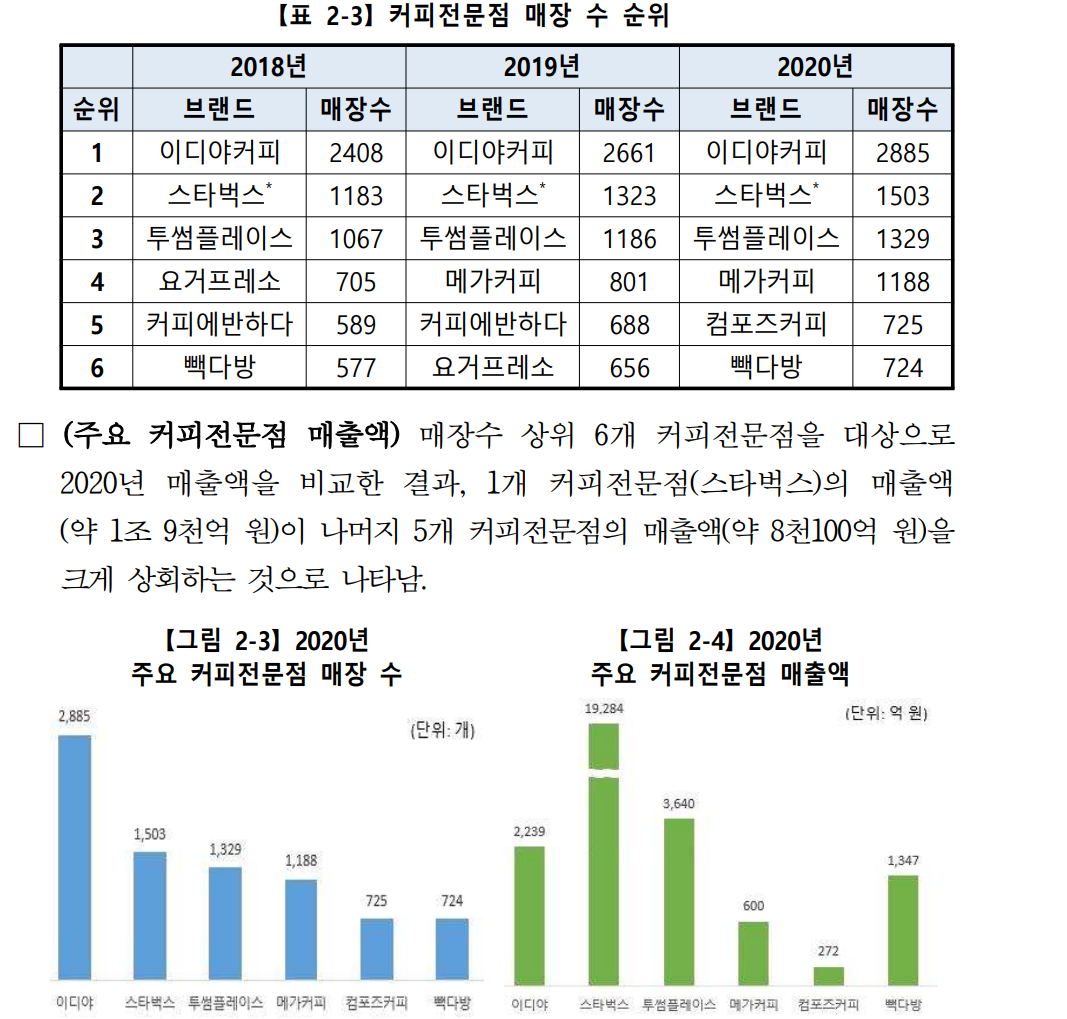

1. 스타벅스
2. 투썸플레이스
3. 이디야
4. 메가커피
5. 컴포즈커피
6. 빽다방

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_cafe / df_seoul_cafe
- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 컴포즈 : df_compose / df_seoul_compose
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 커피빈 : df_coffeebean / df_seoul_coffeebean
- 전체/서울 투썸플레이스 : df_twosome / df_seoul_twosome
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek
- 전체/서울 할리스 : df_hollys / df_seoul_hollys
- 전체/서울 메가커피 : df_mega / df_seoul_mega

### 전국의 커피 전문점 중 주요 5대 브랜드 매장 수

In [160]:
n_cafe = len(df_cafe)
n_star = len(df_starbucks)
n_compose = len(df_compose)
n_twosome = len(df_twosome)
n_ediya = len(df_ediya)
n_mega= len(df_mega)

print("==== 전국 커피전문점 중 주요 5대 커피브랜드 매장 수 ====")
print(f"전국의 커피매장 총수 : {df_cafe.shape[0]}개")
print(f"전국의 주요 5대 커피 브랜드 입점 총주 :\
{n_star+n_twosome+n_ediya+n_mega+n_compose}개")
print(f"1. 스타벅스 : {n_star}개")
print(f"2. 투썸플레이스 : {n_twosome}개")
print(f"3. 이디야 : {n_ediya}개")
print(f"4. 메가커피 : {n_mega}개")
print(f"5. 컴포즈 : {n_compose}개")


==== 전국 커피전문점 중 주요 5대 커피브랜드 매장 수 ====
전국의 커피매장 총수 : 118168개
전국의 주요 5대 커피 브랜드 입점 총주 :6783개
1. 스타벅스 : 1512개
2. 투썸플레이스 : 1154개
3. 이디야 : 2226개
4. 메가커피 : 451개
5. 컴포즈 : 1440개


### 1) 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [220]:
cafe = len(df_cafe)
n_star = len(df_starbucks)
n_compose = len(df_compose)
n_twosome = len(df_twosome)
n_ediya = len(df_ediya)
n_mega= len(df_mega)

print("==== 전국 커피전문점 중 주요 5대 커피브랜드 매장 수 ====")
print(f"전국의 주요 5대 커피브랜드 입점 비율 :\
{(n_star + n_twosome + n_ediya + n_mega + n_compose) / n_cafe * 100:.2f}%")
print(f"1. 스타벅스 : {n_star/n_cafe*100:.2f}%")
print(f"2. 투썸플레이스 : {n_twosome/n_cafe*100:.2f}%")
print(f"3. 이디야 : {n_ediya/n_cafe*100:.2f}%")
print(f"4. 메가커피 : {n_mega/n_cafe*100:.2f}%")
print(f"5. 컴포즈 : {n_compose/n_cafe*100:.2f}%")

==== 전국 커피전문점 중 주요 5대 커피브랜드 매장 수 ====
전국의 주요 5대 커피브랜드 입점 비율 :5.74%
1. 스타벅스 : 1.28%
2. 투썸플레이스 : 0.98%
3. 이디야 : 1.88%
4. 메가커피 : 0.38%
5. 컴포즈 : 1.22%


### 2) 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [240]:
print("==== 서울시 커피브랜드 입점 비율====")
print(f"서울시 카페 총 매장수 : {len(df_cafe_seoul)}")

print(f"스타벅스 : {(len(df_seoul_starbucks)/len(df_cafe_seoul)* 100):.2f}%")
print(f"컴포즈 : {(len(df_seoul_compose)/len(df_cafe_seoul)* 100):.2f}%")
print(f"이디야 : {(len(df_seoul_ediya)/len(df_cafe_seoul)* 100):.2f}%")
print(f"커피빈 : {(len(df_seoul_coffeebean)/len(df_cafe_seoul)* 100):.2f}%")
print(f"투썸플레이스 : {(len(df_seoul_twosome)/len(df_cafe_seoul)* 100):.2f}%")
print(f"빽다방 : {(len(df_seoul_bbaek)/len(df_cafe_seoul)* 100):.2f}%")
print(f"할리스 : {(len(df_seoul_hollys)/len(df_cafe_seoul)* 100):.2f}%")
print(f"메가커피 : {(len(df_seoul_mega)/len(df_cafe_seoul)* 100):.2f}%")

==== 서울시 커피브랜드 입점 비율====
서울시 카페 총 매장수 : 21620
스타벅스 : 2.15%
컴포즈 : 1.09%
이디야 : 2.04%
커피빈 : 0.68%
투썸플레이스 : 1.20%
빽다방 : 0.88%
할리스 : 0.65%
메가커피 : 0.40%


### 3) 각 커피브랜드별 서울 입점 비율 

In [250]:
print("==== 각 커피브랜드의 서울 입점 비율====")

print(f"1. 스타벅스 : {(len(df_seoul_starbucks)/len(df_starbucks)*100):.2f}%")
print(f"2. 투썸플레이스 : {(len(df_seoul_twosome)/len(df_twosome)*100):.2f}%")
print(f"3. 이디야 : {(len(df_seoul_ediya)/len(df_ediya)*100):.2f}%")
print(f"4. 메가커피; : {(len(df_seoul_mega)/len(df_mega)*100):.2f}%")
print(f"5. 컴포즈 : {(len(df_seoul_compose)/len(df_compose)*100):.2f}%")

==== 각 커피브랜드의 서울 입점 비율====
1. 스타벅스 : 30.69%
2. 투썸플레이스 : 22.44%
3. 이디야 : 19.86%
4. 메가커피; : 19.07%
5. 컴포즈 : 16.32%


In [ ]:
- 전체 점포 : data
- 전체/서울 커피전문점 : df_cafe / df_seoul_cafe
- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 컴포즈 : df_compose / df_seoul_compose
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 커피빈 : df_coffeebean / df_seoul_coffeebean
- 전체/서울 투썸플레이스 : df_twosome / df_seoul_twosome
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek
- 전체/서울 할리스 : df_hollys / df_seoul_hollys
- 전체/서울 메가커피 : df_mega / df_seoul_mega

### 4) 서울시 구별 커피 브랜드 매장 빈도표

In [252]:
seoul_df['소계']=seoul_df.sum(axis=1)
seoul_df

,스타벅스,컴포즈,이디야,커피빈,투썸,빽다방,할리스,메가,소계
강남구,76,16,27,39,33,12,15,2,440
중구,42,8,14,7,26,6,9,3,230
서초구,38,3,13,23,14,4,11,3,218
송파구,33,15,29,7,15,11,5,5,240
종로구,28,4,11,13,9,5,7,2,158
영등포구,27,12,23,7,10,6,8,4,194
마포구,26,10,21,7,19,7,12,7,218
용산구,18,1,11,3,7,6,6,2,108
광진구,16,13,13,3,9,7,5,2,136
서대문구,16,7,12,4,12,5,8,2,132


In [253]:
seoul_sum = seoul_df.sum(axis=0)
seoul_sum

스타벅스     464
컴포즈      235
이디야      442
커피빈      147
투썸       259
빽다방      190
할리스      141
메가        86
소계      3928
dtype: int64

In [254]:
# 전국의 주요 브랜드별 커피 매장별 총수
seoul_df.loc['매장합계']=seoul_df.sum(axis=0)
seoul_df

,스타벅스,컴포즈,이디야,커피빈,투썸,빽다방,할리스,메가,소계
강남구,76,16,27,39,33,12,15,2,440
중구,42,8,14,7,26,6,9,3,230
서초구,38,3,13,23,14,4,11,3,218
송파구,33,15,29,7,15,11,5,5,240
종로구,28,4,11,13,9,5,7,2,158
영등포구,27,12,23,7,10,6,8,4,194
마포구,26,10,21,7,19,7,12,7,218
용산구,18,1,11,3,7,6,6,2,108
광진구,16,13,13,3,9,7,5,2,136
서대문구,16,7,12,4,12,5,8,2,132


### 5) 커피 브랜드별 매장 시각화 

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline


In [261]:
## 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"

platform.system() == 'Windows'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

True

In [264]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
platform.system() == 'Windows'       # 윈도우
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

True

#### 커피 주요 브랜드의 서울 입점 매장 수 비교 plot

<AxesSubplot:>

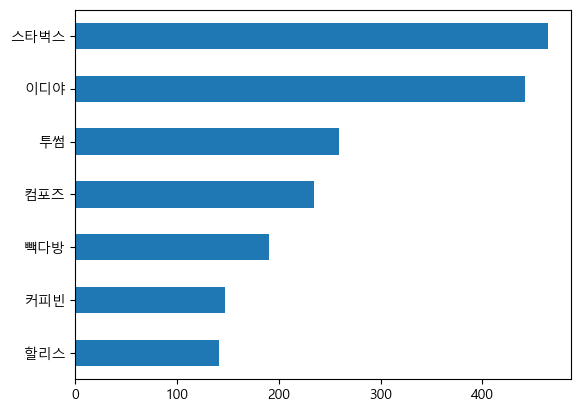

In [266]:
# 주요 커피 브랜드 서울 입점 점포수 비교
seoul_sum['스타벅스':'할리스'].sort_values().plot(kind='barh')

#### 강남구의 주요 커피 브랜드 매장수 비교 plot

<AxesSubplot:>

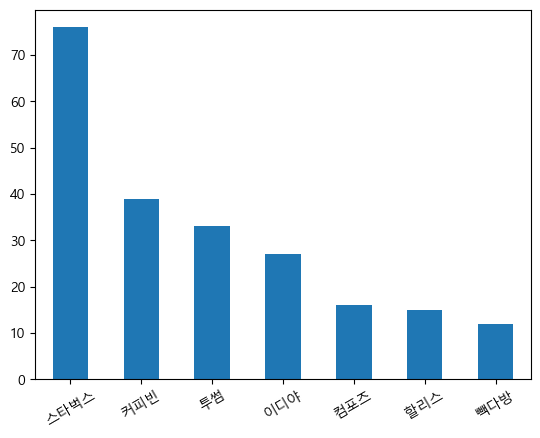

In [274]:
# 주요 커피 브랜드 강남구 입점 점포수 비교
seoul_df.loc['강남구','스타벅스':'할리스'].sort_values(ascending=False)\
.plot(kind='bar', rot = 30)

#### 서울시 구별 스타벅스 매장 수 비교 plot

<AxesSubplot:ylabel='스타벅스'>

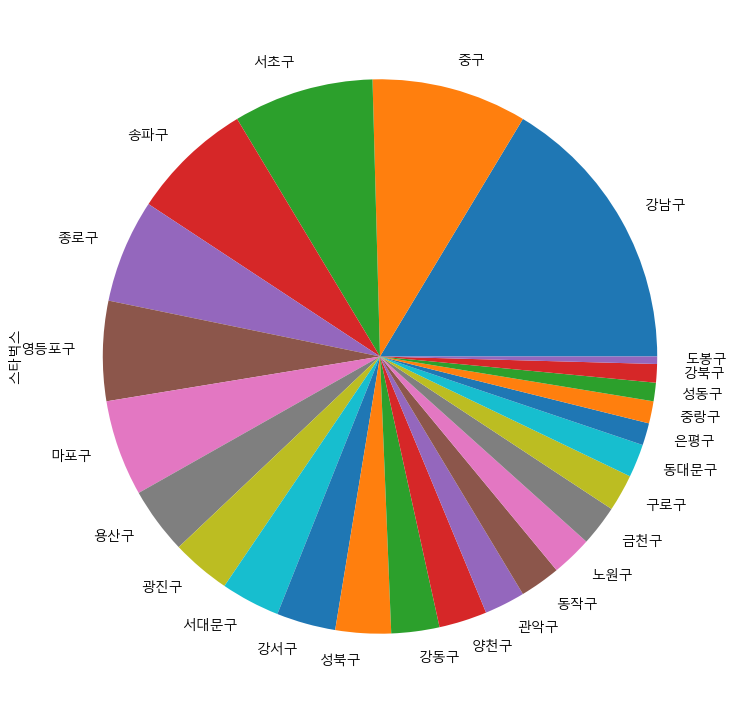

In [282]:
# 각 구별 스타벅스 입점 점포수 비교
seoul_df['스타벅스']['강남구':'도봉구'].plot(kind='pie', figsize=(11,9))


#### 서울시 구별 이디야 매장 수 비교 plot

In [283]:
# 각 구별 이디야 입점 점포수 비교
seoul_sum

스타벅스     464
컴포즈      235
이디야      442
커피빈      147
투썸       259
빽다방      190
할리스      141
메가        86
소계      3928
dtype: int64

#### 커피 주요 브랜드의 전국 입점 매장 수 비교 plot

<AxesSubplot:>

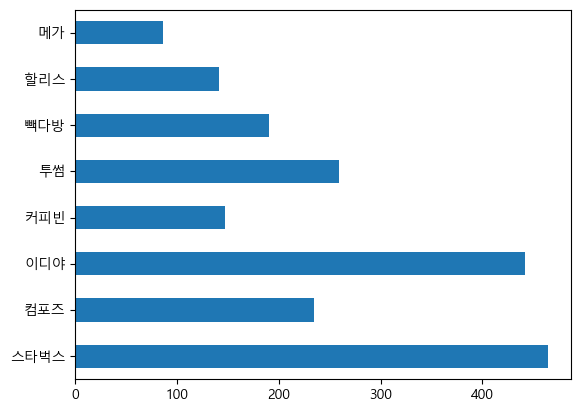

In [284]:
seoul_sum[:-1].plot.barh()